In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# import datasets
fraudulentData = pd.read_csv("/content/drive/MyDrive/SJU/2024-2025 School Year/Fall 2024/CUS 610/Final Project/Fraudulent_E-Commerce_Transaction_Data.csv")
testFraudulentData = pd.read_csv('/content/drive/MyDrive/SJU/2024-2025 School Year/Fall 2024/CUS 610/Final Project/Fraudulent_E-Commerce_Transaction_Data_2.csv')

fraudulentData.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [33]:
testFraudulentData.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [34]:
# create additional attribute to see if billing and shipping address match
fraudulentData['Address Match'] = (fraudulentData['Shipping Address'] == fraudulentData['Billing Address']).astype(int)
testFraudulentData['Address Match'] = (testFraudulentData['Shipping Address'] == testFraudulentData['Billing Address']).astype(int)

fraudulentData.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,1
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3,1
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20,1
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5,1


In [35]:
testFraudulentData

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,1
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,1
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8,0
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20,1
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16,1
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17,1
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23,1
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11,1


In [36]:
# preprocessing - remove unique attributes
fraudulentData = fraudulentData.drop(['Transaction ID'], axis = 1)
fraudulentData = fraudulentData.drop(['Customer ID'], axis = 1)
fraudulentData = fraudulentData.drop(['IP Address'], axis = 1)
fraudulentData = fraudulentData.drop(['Shipping Address'], axis = 1)
fraudulentData = fraudulentData.drop(['Billing Address'], axis = 1)
fraudulentData = fraudulentData.drop(['Transaction Date'], axis = 1)
fraudulentData = fraudulentData.drop(['Customer Location'], axis = 1)

testFraudulentData = testFraudulentData.drop(['Transaction ID'], axis = 1)
testFraudulentData = testFraudulentData.drop(['Customer ID'], axis = 1)
testFraudulentData = testFraudulentData.drop(['IP Address'], axis = 1)
testFraudulentData = testFraudulentData.drop(['Shipping Address'], axis = 1)
testFraudulentData = testFraudulentData.drop(['Billing Address'], axis = 1)
testFraudulentData = testFraudulentData.drop(['Transaction Date'], axis = 1)
testFraudulentData = testFraudulentData.drop(['Customer Location'], axis = 1)

fraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,58.09,bank transfer,electronics,1,17,tablet,0,30,5,1
1,389.96,debit card,electronics,2,40,desktop,0,72,8,1
2,134.19,PayPal,home & garden,2,22,tablet,0,63,3,1
3,226.17,bank transfer,clothing,5,31,desktop,0,124,20,1
4,121.53,bank transfer,clothing,2,51,tablet,0,158,5,1


In [37]:
testFraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,42.32,PayPal,electronics,1,40,desktop,0,282,23,1
1,301.34,credit card,electronics,3,35,tablet,0,223,0,1
2,340.32,debit card,toys & games,5,29,desktop,0,360,8,0
3,95.77,credit card,electronics,5,45,mobile,0,325,20,1
4,77.45,credit card,clothing,5,42,desktop,0,116,15,1


In [38]:
# checking for missing values
fraudulentData.isnull().sum()

,0
Transaction Amount,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Device Used,0
Is Fraudulent,0
Account Age Days,0
Transaction Hour,0
Address Match,0


In [39]:
testFraudulentData.isnull().sum()

,0
Transaction Amount,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Device Used,0
Is Fraudulent,0
Account Age Days,0
Transaction Hour,0
Address Match,0


In [40]:
# change address match to category
fraudulentData['Address Match'].astype('category')
fraudulentData['Address Match'] = fraudulentData['Address Match'].replace({
    0: 'no match',
    1: 'match'
})

testFraudulentData['Address Match'].astype('category')
testFraudulentData['Address Match'] = testFraudulentData['Address Match'].replace({
    0: 'no match',
    1: 'match'
})

fraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,58.09,bank transfer,electronics,1,17,tablet,0,30,5,match
1,389.96,debit card,electronics,2,40,desktop,0,72,8,match
2,134.19,PayPal,home & garden,2,22,tablet,0,63,3,match
3,226.17,bank transfer,clothing,5,31,desktop,0,124,20,match
4,121.53,bank transfer,clothing,2,51,tablet,0,158,5,match


In [41]:
# change 'Is Fraudulent' to category from binary
fraudulentData['Is Fraudulent'].astype('category')
fraudulentData['Is Fraudulent'] = fraudulentData['Is Fraudulent'].replace({
    0: 'not fraudulent',
    1: 'fraudulent'
})

testFraudulentData['Is Fraudulent'].astype('category')
testFraudulentData['Is Fraudulent'] = fraudulentData['Is Fraudulent'].replace({
    0: 'not Fraudulent',
    1: 'fraudulent'
})


<Axes: >

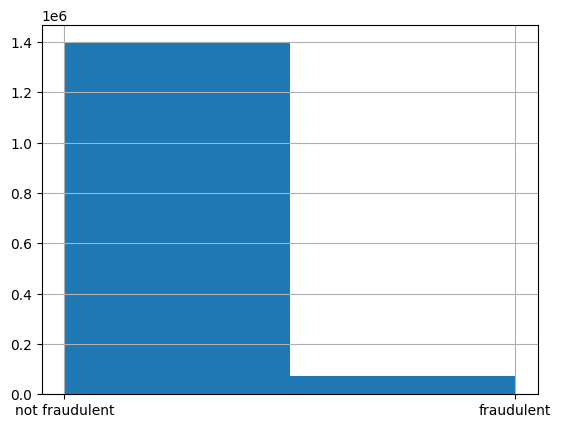

In [42]:
# visualize the num of fraudulent transactions
fraudulentData['Is Fraudulent'].hist(bins = 2)

<Axes: >

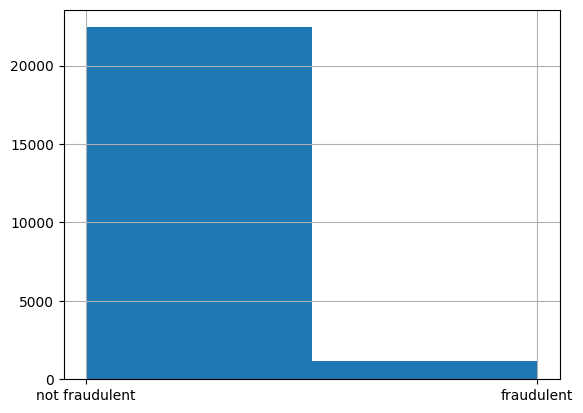

In [43]:
testFraudulentData['Is Fraudulent'].hist(bins = 2)

In [44]:
# create bins for transaction amount
fraudulentData['Transaction Amount'] = pd.qcut(fraudulentData['Transaction Amount'], q = 3, labels=['low', 'medium', 'high'])
testFraudulentData['Transaction Amount'] = pd.qcut(testFraudulentData['Transaction Amount'], q = 3, labels = ['low', 'medium', 'high'])

fraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,bank transfer,electronics,1,17,tablet,not fraudulent,30,5,match
1,high,debit card,electronics,2,40,desktop,not fraudulent,72,8,match
2,medium,PayPal,home & garden,2,22,tablet,not fraudulent,63,3,match
3,medium,bank transfer,clothing,5,31,desktop,not fraudulent,124,20,match
4,medium,bank transfer,clothing,2,51,tablet,not fraudulent,158,5,match


In [45]:
testFraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,PayPal,electronics,1,40,desktop,not fraudulent,282,23,match
1,high,credit card,electronics,3,35,tablet,not fraudulent,223,0,match
2,high,debit card,toys & games,5,29,desktop,not fraudulent,360,8,no match
3,medium,credit card,electronics,5,45,mobile,not fraudulent,325,20,match
4,low,credit card,clothing,5,42,desktop,not fraudulent,116,15,match


In [46]:
# change quantity to bins
fraudulentData['Quantity'] = pd.qcut(fraudulentData['Quantity'], q = 3, labels = ['low quantity', 'medium quantity', 'high quantity'])
testFraudulentData['Quantity'] = pd.qcut(testFraudulentData['Quantity'], q = 3, labels = ['low quantity', 'medium quantity', 'high quantity'])
fraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,bank transfer,electronics,low quantity,17,tablet,not fraudulent,30,5,match
1,high,debit card,electronics,low quantity,40,desktop,not fraudulent,72,8,match
2,medium,PayPal,home & garden,low quantity,22,tablet,not fraudulent,63,3,match
3,medium,bank transfer,clothing,high quantity,31,desktop,not fraudulent,124,20,match
4,medium,bank transfer,clothing,low quantity,51,tablet,not fraudulent,158,5,match


In [47]:
testFraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,PayPal,electronics,low quantity,40,desktop,not fraudulent,282,23,match
1,high,credit card,electronics,medium quantity,35,tablet,not fraudulent,223,0,match
2,high,debit card,toys & games,high quantity,29,desktop,not fraudulent,360,8,no match
3,medium,credit card,electronics,high quantity,45,mobile,not fraudulent,325,20,match
4,low,credit card,clothing,high quantity,42,desktop,not fraudulent,116,15,match


In [48]:
testFraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,PayPal,electronics,low quantity,40,desktop,not fraudulent,282,23,match
1,high,credit card,electronics,medium quantity,35,tablet,not fraudulent,223,0,match
2,high,debit card,toys & games,high quantity,29,desktop,not fraudulent,360,8,no match
3,medium,credit card,electronics,high quantity,45,mobile,not fraudulent,325,20,match
4,low,credit card,clothing,high quantity,42,desktop,not fraudulent,116,15,match


In [49]:
# change account age days to bins
fraudulentData['Account Age Days'] = pd.qcut(fraudulentData['Account Age Days'], q = 4, labels = ['New Accounts', 'Young Accounts', 'Older Accounts', 'Veteran Accounts'])
testFraudulentData['Account Age Days'] = pd.qcut(testFraudulentData['Account Age Days'], q = 4, labels = ['New Accounts', 'Young Accounts', 'Older Accounts', 'Veteran Accounts'])

fraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,bank transfer,electronics,low quantity,17,tablet,not fraudulent,New Accounts,5,match
1,high,debit card,electronics,low quantity,40,desktop,not fraudulent,New Accounts,8,match
2,medium,PayPal,home & garden,low quantity,22,tablet,not fraudulent,New Accounts,3,match
3,medium,bank transfer,clothing,high quantity,31,desktop,not fraudulent,Young Accounts,20,match
4,medium,bank transfer,clothing,low quantity,51,tablet,not fraudulent,Young Accounts,5,match


In [50]:
testFraudulentData.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,low,PayPal,electronics,low quantity,40,desktop,not fraudulent,Veteran Accounts,23,match
1,high,credit card,electronics,medium quantity,35,tablet,not fraudulent,Older Accounts,0,match
2,high,debit card,toys & games,high quantity,29,desktop,not fraudulent,Veteran Accounts,8,no match
3,medium,credit card,electronics,high quantity,45,mobile,not fraudulent,Veteran Accounts,20,match
4,low,credit card,clothing,high quantity,42,desktop,not fraudulent,Young Accounts,15,match


In [51]:
fraudulentData['Transaction Hour'].value_counts()

,count
Transaction Hour,
3,66043
4,65721
2,65693
0,65438
1,65317
5,65252
6,60577
7,60501
12,60328


In [79]:
# filter out fraudulent transaction and put them in a list of transactions
fraudulentTransactions = fraudulentData[fraudulentData['Is Fraudulent'] == 'fraudulent'].copy()

apriori_data = fraudulentTransactions[['Transaction Amount', 'Payment Method', 'Product Category', 'Address Match', 'Transaction Amount', 'Quantity', 'Account Age Days']].copy()
for col in apriori_data.columns:
   apriori_data[col] = apriori_data[col].astype(str)

transactions = apriori_data.values.tolist()

In [80]:
# generate associatiion rules from Aprori algorithm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
fraudulent_apriori = pd.DataFrame(te_ary, columns = te.columns_)

frequent_itemsets = apriori(fraudulent_apriori, min_support = 0.1, use_colnames = True)

num_itemsets = len(fraudulentData)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.0, num_itemsets = num_itemsets)

rules = rules.sort_values(by = 'confidence', ascending = False)
print(rules.head())

                               antecedents consequents  antecedent support  \
100                     (debit card, high)     (match)            0.131775   
118  (medium quantity, high, New Accounts)     (match)            0.111528   
38                       (health & beauty)     (match)            0.200723   
22                      (Veteran Accounts)     (match)            0.153417   
106                (medium quantity, high)     (match)            0.208402   

     consequent support   support  confidence      lift  representativity  \
100            0.900417  0.119044    0.903392  1.003303               1.0   
118            0.900417  0.100734    0.903218  1.003111               1.0   
38             0.900417  0.181275    0.903110  1.002991               1.0   
22             0.900417  0.138547    0.903072  1.002949               1.0   
106            0.900417  0.188169    0.902911  1.002770               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulcz

In [55]:
# set my testing and training sets
from sklearn.preprocessing import LabelEncoder

x_train = fraudulentData.drop(['Is Fraudulent'], axis = 1)
y_train = fraudulentData['Is Fraudulent']

x_test = testFraudulentData.drop(['Is Fraudulent'], axis = 1)
y_test = testFraudulentData['Is Fraudulent']

encoder = LabelEncoder()

for column in x_train.select_dtypes(include=['object','category']).columns:
    # Fit the encoder on the combined unique values from both training and test data
    all_values = pd.concat([x_train[column], x_test[column]]).unique()
    encoder.fit(all_values)

    x_train[column] = encoder.transform(x_train[column])
    x_test[column] = encoder.transform(x_test[column])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1472952, 9)
(1472952,)
(23634, 9)
(23634,)


In [56]:
# create decision tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

myTree = tree.DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced')
myTree = myTree.fit(x_train, y_train)
train_pred = myTree.predict(x_train)

test_pred = myTree.predict(x_test)

Accuracy on test data is 0.88


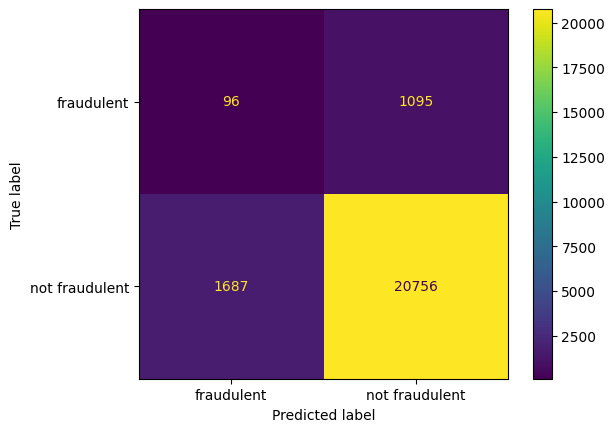

In [57]:
# create confusion matrix based on decision tree
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, test_pred)))

confusionMatrix = confusion_matrix(y_test, test_pred)
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=myTree.classes_)
disp.plot()
plt.show()

In [58]:
# calculate the cross validations scores of the decision tree
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(myTree, x_train, y_train, cv=kf)

print("Cross Validation Scores: ", scores)
print("Average Score: ", scores.mean())

Cross Validation Scores:  [0.89259043 0.89307924 0.89276622 0.89160528 0.89176822 0.89373027
 0.89254897 0.89392036 0.89261686 0.89377779]
Average Score:  0.8928403641198466


In [59]:
# improve accurary - random forest
from sklearn.ensemble import RandomForestClassifier

myRandomForest = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')
myRandomForest = myRandomForest.fit(x_train, y_train)
train_pred = myRandomForest.predict(x_train)

test_pred = myRandomForest.predict(x_test)

Accuracy on test data is 0.91


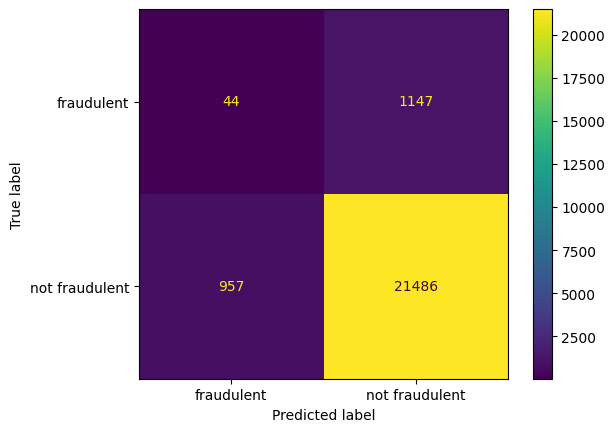

In [60]:
# create confusion matrix based on random forest
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, test_pred)))

confusionMatrix = confusion_matrix(y_test, test_pred)
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=myTree.classes_)
disp.plot()
plt.show()